In [1]:
from dataset import DataClean
from training_class import ModelTrainer, SimpleCNN, setUp
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from torchvision import transforms

In [2]:
dataClean = DataClean()
X_train, y_train = dataClean.get_train_data()
X_test, y_test = dataClean.get_test_data()

print(X_train.head())
print(y_train.head())


   pixel1  pixel2  pixel3    pixel4    pixel5  pixel6  pixel7    pixel8  \
0     0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
1     0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
2     0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.019608   
3     0.0     0.0     0.0  0.003922  0.007843     0.0     0.0  0.000000   
4     0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   

   pixel9  pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
0     0.0      0.0  ...  0.000000       0.0       0.0  0.000000  0.000000   
1     0.0      0.0  ...  0.000000       0.0       0.0  0.000000  0.000000   
2     0.0      0.0  ...  0.000000       0.0       0.0  0.117647  0.168627   
3     0.0      0.0  ...  0.011765       0.0       0.0  0.000000  0.000000   
4     0.0      0.0  ...  0.000000       0.0       0.0  0.000000  0.000000   

   pixel780  pixel781  pixel782  pixel783  pixel784  
0  0.000000       0.0       0.0 

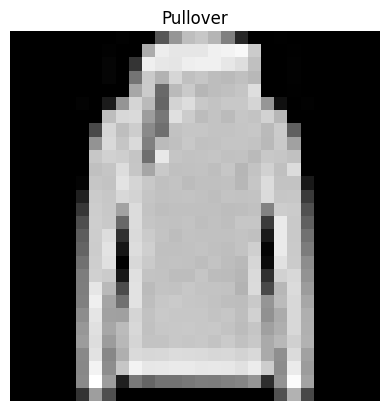

In [3]:
dataClean.print_random_image()

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = setUp(X_train, y_train, transform=transform)
val_dataset = setUp(X_val, y_val, transform=transform)
test_dataset = setUp(X_test, y_test, transform=transform)

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=64)
test_dataloader = DataLoader(test_dataset, batch_size=64)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

trainer = ModelTrainer(model, loss_fn, optimizer, device, dataClean)

epochs = 50 
for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")
    trainer.train(train_dataloader)
    trainer.test(val_dataloader)



Epoch 1/50
Epoch 1/1, Loss: 0.4214, Accuracy: 84.67%
Test Loss: 0.3343, Test Accuracy: 87.57%
Epoch 2/50
Epoch 1/1, Loss: 0.2691, Accuracy: 90.09%
Test Loss: 0.2762, Test Accuracy: 89.72%
Epoch 3/50
Epoch 1/1, Loss: 0.2207, Accuracy: 91.93%
Test Loss: 0.2314, Test Accuracy: 91.14%
Epoch 4/50
Epoch 1/1, Loss: 0.1855, Accuracy: 93.12%
Test Loss: 0.2353, Test Accuracy: 91.13%
Epoch 5/50
Epoch 1/1, Loss: 0.1530, Accuracy: 94.22%
Test Loss: 0.2506, Test Accuracy: 91.29%
Epoch 6/50
Epoch 1/1, Loss: 0.1258, Accuracy: 95.30%
Test Loss: 0.2578, Test Accuracy: 91.69%
Epoch 7/50
Epoch 1/1, Loss: 0.1019, Accuracy: 96.16%
Test Loss: 0.2845, Test Accuracy: 91.50%
Epoch 8/50
Epoch 1/1, Loss: 0.0816, Accuracy: 96.98%
Test Loss: 0.2816, Test Accuracy: 91.54%
Epoch 9/50
Epoch 1/1, Loss: 0.0634, Accuracy: 97.62%
Test Loss: 0.3125, Test Accuracy: 91.64%
Epoch 10/50
Epoch 1/1, Loss: 0.0550, Accuracy: 97.97%
Test Loss: 0.3544, Test Accuracy: 91.30%
Epoch 11/50
Epoch 1/1, Loss: 0.0454, Accuracy: 98.30%
Test 

Test Loss: 0.8403, Test Accuracy: 92.05%
Accuracy: 0.9205, Precision: 0.9205, Recall: 0.9205, Mean F2 Score: 0.9204
Worst F2 Score Label: Shirt, F2 Score: 0.7565


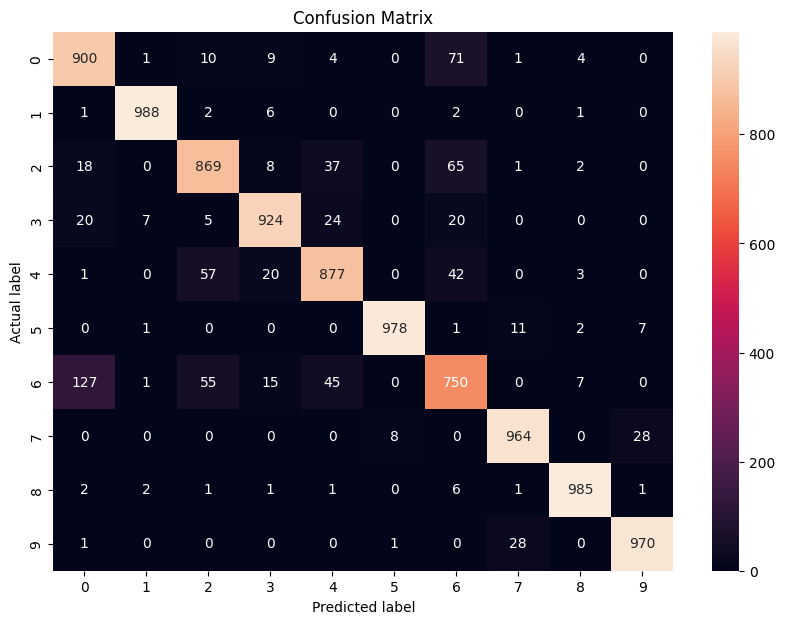

In [8]:
# Final evaluation on the test dataset
trainer.test(test_dataloader)
trainer.analyze_results(test_dataloader)
